In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# example parameters
params = {
    'absorption_rate': {
        'alpha': None,  # Set per scenario
        'beta': None,   # Set per scenario
        'max_monthly_lots': 100
    },
    'marketing_costs': {
        'base_per_lot': 500,
        'absorption_correlation': 0.8
    }
}

In [4]:
# dummy class to encapsulate methods
class Simulator:
    def __init__(self, params):
        self.params = params

    def generate_absorption_rate(self, n_simulations):
        alpha = self.params['absorption_rate']['alpha']
        beta = self.params['absorption_rate']['beta']
        max_monthly_absorption = self.params['absorption_rate']['max_monthly_lots']
        absorption_rates = np.random.beta(alpha, beta, n_simulations)
        return absorption_rates * max_monthly_absorption

    def generate_marketing_costs(self, absorption_rates, n_simulations):
        base_cost = self.params['marketing_costs']['base_per_lot']
        corr_strength = self.params['marketing_costs']['absorption_correlation']
        multiplier = 1 + (absorption_rates - absorption_rates.mean()) * corr_strength
        noise = np.random.normal(1, 0.2, n_simulations)
        marketing = base_cost * multiplier * noise
        return np.maximum(marketing, base_cost * 0.5)

In [5]:
# Run simulation for high and low absorption rates
n = 1000
scenarios = {
    'High Absorption': {'alpha': 8, 'beta': 2},
    'Low Absorption': {'alpha': 2, 'beta': 8}
}

results = []

for label, dist_params in scenarios.items():
    params['absorption_rate'].update(dist_params)
    sim = Simulator(params)
    rates = sim.generate_absorption_rate(n)
    costs = sim.generate_marketing_costs(rates, n)
    results.append((label, rates, costs))


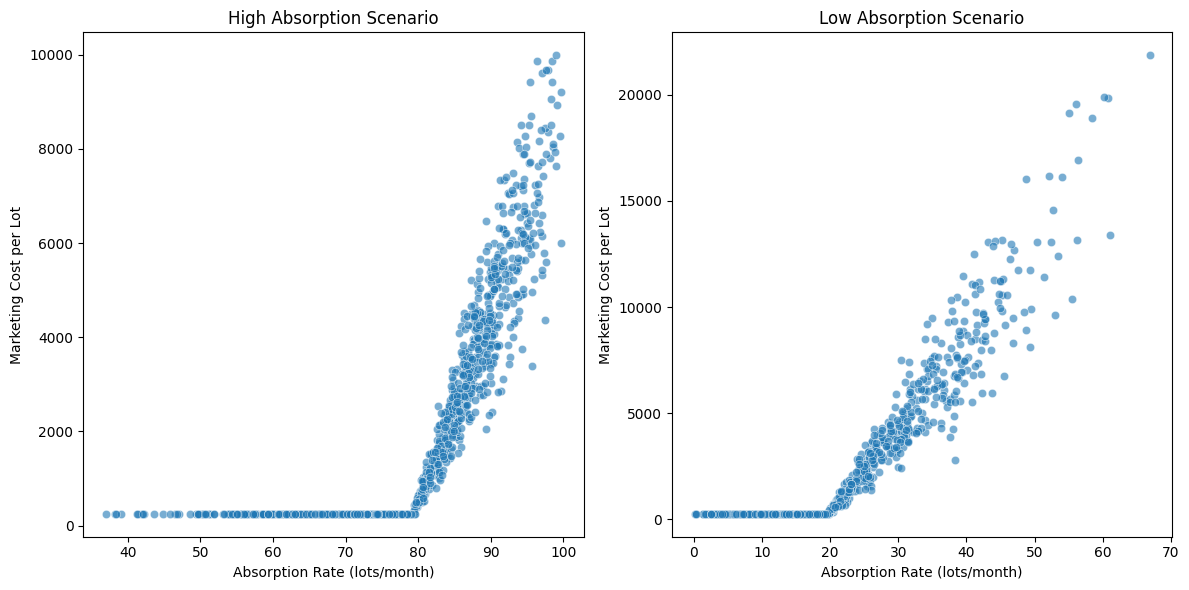

In [6]:
# Plot results
plt.figure(figsize=(12, 6))
for i, (label, rates, costs) in enumerate(results):
    plt.subplot(1, 2, i+1)
    sns.scatterplot(x=rates, y=costs, alpha=0.6)
    plt.title(f'{label} Scenario')
    plt.xlabel('Absorption Rate (lots/month)')
    plt.ylabel('Marketing Cost per Lot')
plt.tight_layout()
plt.show()


### High Absorption Rate

**Meaning:** This simulates a thriving market where lots are selling briskly—buyers are active, marketing efforts are performing well, and demand is high.

**What the plot shows:**
- Absorption rates hover mostly between 40 and 100 lots/month.
- Marketing cost per lot increases gradually at first, then spikes sharply around the 80-lot mark.
- That upward trend reveals a strong correlation: as you're absorbing more lots (i.e., selling faster), you're spending more per lot—either because campaigns are intensifying, or marginal gains require heavier investment.

**Interpretation:**
- You’re likely in a scaling phase, where higher demand justifies higher spend.
- The steep climb past 80 could reflect aggressive tactics—such as premium ads, influencer partnerships, or larger incentives to buyers.
- Essentially: success isn't cheap, and the cost curve shows how marketing accelerates as absorption grows.



### Low Absorption Scenario (Right Plot)
**Meaning:** This models a tougher market—lots aren't moving quickly, perhaps due to low demand, ineffective messaging, or economic constraints.

**What the plot shows:**
- Absorption rates mostly stay below 70, with clustering around the low end.
- Marketing costs have more volatility—even with modest absorption rates, costs sometimes exceed 15,000 per lot.
- There’s still a positive trend, but it's messier—suggesting less efficient marketing.

**Interpretation:**
- You're likely spending either reactively (to spark movement in a slow market) or inefficiently (limited results from high investment).
- The wide scatter may reflect guesswork or fragmented strategies—trying different things with uneven outcomes.
- In short: low absorption comes at a price, and it’s often a costly gamble.
